<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(0_4)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.4_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,87.467661,60.084483,58.762212,-1.267854,215.046503,216.732927,-1.686423
1,0.0,1.0,75.427604,66.787560,34.802035,0.704210,187.721409,188.051200,-0.329791
2,0.0,2.0,97.490622,35.018135,21.338932,-0.673494,163.174195,165.225789,-2.051594
3,0.0,3.0,49.162916,23.304728,31.320070,0.740369,114.528082,113.489072,1.039010
4,0.0,4.0,70.570376,70.626809,74.341997,-7.709971,217.829211,225.262074,-7.432863
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,34.991258,31.899005,72.465251,3.896729,153.252243,149.497143,3.755100
19996,999.0,16.0,92.759438,26.262796,77.372666,-1.900145,204.494755,205.689696,-1.194940
19997,999.0,17.0,45.690994,93.770471,21.377683,-1.003547,169.835600,171.427547,-1.591947
19998,999.0,18.0,97.475528,81.606370,32.609906,1.189751,222.881556,221.429459,1.452096


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    87.467661  60.084483  58.762212 -1.267854  215.046503   
      1.0    75.427604  66.787560  34.802035  0.704210  187.721409   
      2.0    97.490622  35.018135  21.338932 -0.673494  163.174195   
      3.0    49.162916  23.304728  31.320070  0.740369  114.528082   
      4.0    70.570376  70.626809  74.341997 -7.709971  217.829211   
...                ...        ...        ...       ...         ...   
999.0 15.0   34.991258  31.899005  72.465251  3.896729  153.252243   
      16.0   92.759438  26.262796  77.372666 -1.900145  204.494755   
      17.0   45.690994  93.770471  21.377683 -1.003547  169.835600   
      18.0   97.475528  81.606370  32.609906  1.189751  222.881556   
      19.0   80.227537  56.238788  59.662487  2.823884  208.952696   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    216.732927 -1.686423  
      1.0    188.051200 -0.329791  
      2.0    165.225789 -2.051594  
      3.0    113.489072  1.039010  
      4.0    225.262074 -7.432863  
...                 ...       ...  
999.0 15.0   149.497143  3.755100  
      16.0   205.689696 -1.194940  
      17.0   171.427547 -1.591947  
      18.0   221.429459  1.452096  
      19.0   205.708928  3.243768  

[20000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    87.467661  60.084483  58.762212 -1.267854  215.046503   
      1.0    75.427604  66.787560  34.802035  0.704210  187.721409   
      2.0    97.490622  35.018135  21.338932 -0.673494  163.174195   
      3.0    49.162916  23.304728  31.320070  0.740369  114.528082   
      4.0    70.570376  70.626809  74.341997 -7.709971  217.829211   
...                ...        ...        ...       ...         ...   
999.0 15.0   34.991258  31.899005  72.465251  3.896729  153.252243   
      16.0   92.759438  26.262796  77.372666 -1.900145  204.494755   
      17.0   45.690994  93.770471  21.377683 -1.003547  169.835600   
      18.0   97.475528  81.606370  32.609906  1.189751  222.881556   
      19.0   80.227537  56.238788  59.662487  2.823884  208.952696   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    216.732927 -1.686423  
      1.0    188.051200 -0.329791  
      2.0    165.225789 -2.051594  
      3.0    113.489072  1.039010  
      4.0    225.262074 -7.432863  
...                 ...       ...  
999.0 15.0   149.497143  3.755100  
      16.0   205.689696 -1.194940  
      17.0   171.427547 -1.591947  
      18.0   221.429459  1.452096  
      19.0   205.708928  3.243768  

[20000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,87.467661,60.084483,58.762212,-1.267854,215.046503,216.732927,-1.686423
1,0.0,1.0,75.427604,66.787560,34.802035,0.704210,187.721409,188.051200,-0.329791
2,0.0,2.0,97.490622,35.018135,21.338932,-0.673494,163.174195,165.225789,-2.051594
3,0.0,3.0,49.162916,23.304728,31.320070,0.740369,114.528082,113.489072,1.039010
4,0.0,4.0,70.570376,70.626809,74.341997,-7.709971,217.829211,225.262074,-7.432863
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,34.991258,31.899005,72.465251,3.896729,153.252243,149.497143,3.755100
19996,999.0,16.0,92.759438,26.262796,77.372666,-1.900145,204.494755,205.689696,-1.194940
19997,999.0,17.0,45.690994,93.770471,21.377683,-1.003547,169.835600,171.427547,-1.591947
19998,999.0,18.0,97.475528,81.606370,32.609906,1.189751,222.881556,221.429459,1.452096


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    87.467661  60.084483  58.762212 -1.267854  215.046503   
      1.0    75.427604  66.787560  34.802035  0.704210  187.721409   
      2.0    97.490622  35.018135  21.338932 -0.673494  163.174195   
      3.0    49.162916  23.304728  31.320070  0.740369  114.528082   
      4.0    70.570376  70.626809  74.341997 -7.709971  217.829211   
...                ...        ...        ...       ...         ...   
999.0 15.0   34.991258  31.899005  72.465251  3.896729  153.252243   
      16.0   92.759438  26.262796  77.372666 -1.900145  204.494755   
      17.0   45.690994  93.770471  21.377683 -1.003547  169.835600   
      18.0   97.475528  81.606370  32.609906  1.189751  222.881556   
      19.0   80.227537  56.238788  59.662487  2.823884  208.952696   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    216.732927 -1.686423  
      1.0    188.051200 -0.329791  
      2.0    165.225789 -2.051594  
      3.0    113.489072  1.039010  
      4.0    225.262074 -7.432863  
...                 ...       ...  
999.0 15.0   149.497143  3.755100  
      16.0   205.689696 -1.194940  
      17.0   171.427547 -1.591947  
      18.0   221.429459  1.452096  
      19.0   205.708928  3.243768  

[20000 rows x 7 columns]

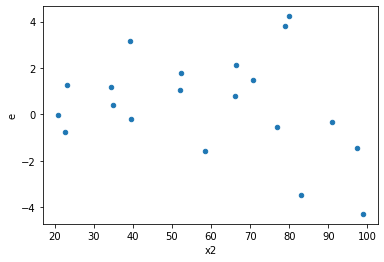

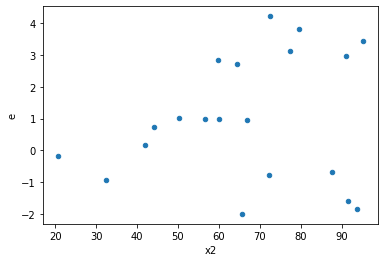

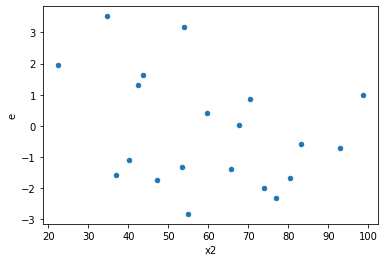

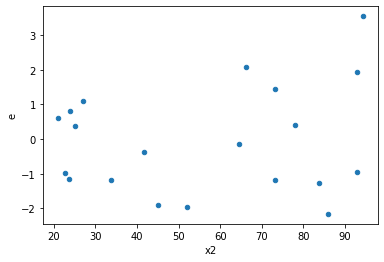

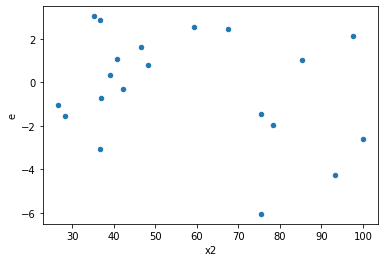

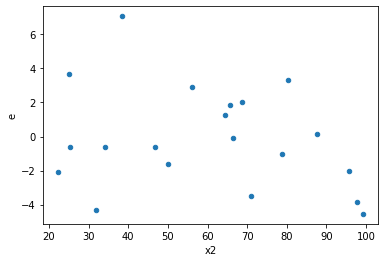

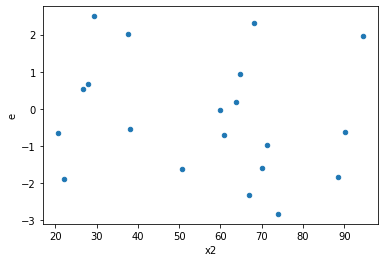

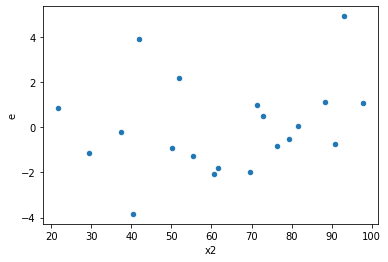

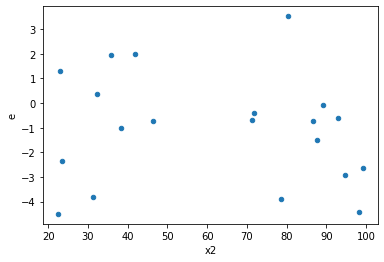

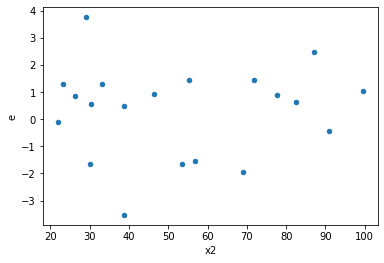

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
5.0,8.0,6.0,49.917468543550434,50.98626317751703,6.239683567943804,8.497710529586172,1.3618816462493253,0.7266101463562047,0.6366949268218977,0.36330507317810234,Reject005=1 : Homoscedasticity
6.0,6.0,8.0,7.215254465056106,39.06404407021715,1.2025424108426843,4.883005508777144,4.060568230067966,0.07227318442934583,0.9638634077853271,0.036136592214672913,Reject005=1 : Homoscedasticity
7.0,1.0,13.0,2.3603728026171356e-24,56.50002835347385,2.3603728026171356e-24,4.346156027190296,1.841300671813945e+24,0.0,1.0,0.0,Reject005=0 : Heteroscedasticity
8.0,5.0,9.0,8.036240648025169,46.56286217612786,1.6072481296050338,5.173651352903096,3.218949991358504,0.12204341532206509,0.9389782923389675,0.06102170766103254,Reject005=1 : Homoscedasticity
10.0,7.0,7.0,8.638771788824087,36.80206564442123,1.2341102555462982,5.257437949203033,4.260103929592374,0.07502646125542856,0.9624867693722857,0.03751323062771428,Reject005=1 : Homoscedasticity
12.0,8.0,6.0,20.351603683658755,18.847555317805643,2.5439504604573444,3.1412592196342737,1.2347957511206986,0.81975070942167,0.590124645289165,0.409875354710835,Reject005=1 : Homoscedasticity
16.0,6.0,8.0,5.09559964601369,11.377693576402399,0.8492666076689482,1.4222116970502998,1.6746351313093082,0.4884855616090338,0.7557572191954831,0.2442427808045169,Reject005=1 : Homoscedasticity
17.0,8.0,6.0,15.139268145971778,26.747104697449206,1.8924085182464723,4.457850782908201,2.355649290269998,0.3124226064310398,0.8437886967844801,0.1562113032155199,Reject005=1 : Homoscedasticity
21.0,6.0,8.0,42.684922814190585,60.45995845137725,7.114153802365098,7.557494806422156,1.0623181640955905,0.9096572890013512,0.5451713554993244,0.4548286445006756,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,11.0,3.0,118.6722161524137,6.1649840521640895,10.788383286583063,2.0549946840546967,0.1904821723019782,0.034340006612197944,Reject005=0 : Heteroscedasticity
1.0,8.0,6.0,53.7096696234251,36.65088471613235,6.7137087029281375,6.108480786022059,0.9098519248173349,0.8755729411913288,Reject005=1 : Homoscedasticity
2.0,9.0,5.0,36.07185662645747,12.922433150830189,4.007984069606385,2.5844866301660376,0.644834556545494,0.5340883557032481,Reject005=1 : Homoscedasticity
3.0,10.0,4.0,43.20744615800851,3.6828126689767586,4.320744615800851,0.9207031672441897,0.21308900412146603,0.04323627141134124,Reject005=0 : Heteroscedasticity
4.0,7.0,7.0,21.83704805047445,19.351090910358806,3.1195782929249214,2.7644415586226865,0.8861587365485679,0.8774161282881078,Reject005=1 : Homoscedasticity
5.0,8.0,6.0,49.917468543550434,50.98626317751703,6.239683567943804,8.497710529586172,1.3618816462493253,0.7266101463562047,Reject005=1 : Homoscedasticity
6.0,6.0,8.0,7.215254465056106,39.06404407021715,1.2025424108426843,4.883005508777144,4.060568230067966,0.07227318442934583,Reject005=1 : Homoscedasticity
7.0,1.0,13.0,2.3603728026171356e-24,56.50002835347385,2.3603728026171356e-24,4.346156027190296,1.841300671813945e+24,0.0,Reject005=0 : Heteroscedasticity
8.0,5.0,9.0,8.036240648025169,46.56286217612786,1.6072481296050338,5.173651352903096,3.218949991358504,0.12204341532206509,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      849
Reject005=0 : Heteroscedasticity    151
Name: Result_test, dtype: int64